In [26]:
# Dataset 2 : Movies

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# Feature selection
from sklearn.decomposition import PCA
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
#df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

print(X)
print(y)

      Year  Length  Title  Subject  Actor  Actress  Director  Popularity
0       68      71   1486        2     33        0         8          68
1       69      73    680        2     74        0         8          68
2       61      64    389        6    713        1       158          79
3       57      82    362        0    137        1       404           6
4       56      54    383        4    266        1       435          14
...    ...     ...    ...      ...    ...      ...       ...         ...
1654    10     149   1336        0    720      710       759          19
1655    67      63    203        0    727      710       759          43
1656    66      38    699        4    727      710       759          19
1657    55      35    321        2    745      710       759          18
1658    69      25   1254        2    745      710       759           4

[1659 rows x 8 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1654    0
1655    0
1656    0
1657    0

In [17]:
# preprocessing StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the object 
scaler = StandardScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

Variance explained by all 10 principal components =  100.0
[16.95435317 15.99579081 13.20902502 12.41675154 11.52715697 11.23580556
 10.04922834  8.61188859]
[ 16.95435317  32.95014398  46.159169    58.57592054  70.1030775
  81.33888307  91.38811141 100.        ]


Text(0.5, 1.0, 'Variance explained by all principal components for my dataset 2')

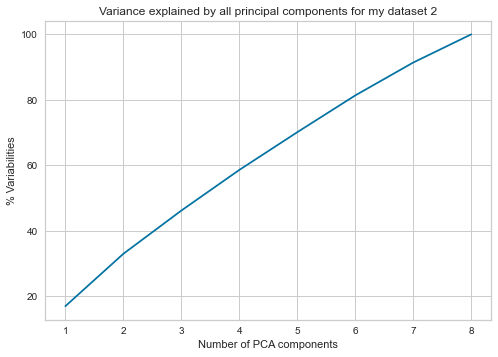

In [27]:
pca_9 = PCA(n_components = 8, random_state = 42)
X_pca_9 = pca_9.fit_transform(X_scaled)

print("Variance explained by all 10 principal components = ",
      sum(pca_9.explained_variance_ratio_*100))

print(pca_9.explained_variance_ratio_*100)

print(np.cumsum(pca_9.explained_variance_ratio_*100))

X=[i for i in range(1,9)]
plt.plot(X,np.cumsum(pca_9.explained_variance_ratio_*100))
plt.xlabel('Number of PCA components')
plt.ylabel('% Variabilities')
plt.title('Variance explained by all principal components for my dataset 2')

/Users/ye/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


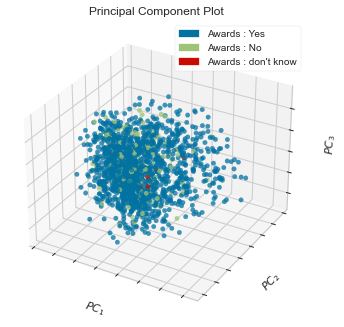

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [24]:
from yellowbrick.features import PCA

visualizer = PCA(
    scale=True, projection=3, classes=['Awards : Yes','Awards : No',"Awards : don't know"])
visualizer.fit_transform(X_scaled, y)
visualizer.show()

In [30]:
pca = PCA(n_components = 0.90, random_state = 42)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)


(1659, 7)


In [36]:
df_new3 = pd.DataFrame(X_pca, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7'] )

df_new3['Awards'] = df.Awards
df_new3.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Awards
0,-2.627638,1.612511,0.612168,0.393191,-1.109238,-0.505335,-0.464163,0
1,-2.610056,1.451063,-0.749767,0.370673,-0.264477,-0.207822,-0.033173,0
2,-0.224970,1.341955,-1.583229,-0.004188,-0.519286,1.746521,-0.063149,0
3,-2.398727,0.023595,-0.205948,-0.005393,1.497981,0.664163,-0.687976,0
4,-1.267658,0.416883,-0.271223,-0.554952,1.593522,0.703084,-0.877379,0


In [37]:
# save the data
df_new3.to_csv('Movie_pca.csv', index=False)